
# Project: Investigate a Dataset (TMDb movie data)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

The project is to do the data analysis steps to a movie dataset, and find an answers for my questions.


The question that I am trying to answer with this analysis is:


1-What is the highest rating genre of all time in this data set?


2-Relationship between budget and voting average (rating)?




In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

### General Properties

In [2]:
df=pd.read_csv('movies.csv') # load csv
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [3]:
#droping all unnecessary columns for my research
df.drop(['id','imdb_id','homepage','tagline','overview','production_companies','release_date','director','cast','keywords','runtime','budget_adj','revenue_adj','popularity','vote_count','revenue'],axis=1,inplace = True)

In [4]:
df.head()

,budget,original_title,genres,vote_average,release_year
0,150000000,Jurassic World,Action|Adventure|Science Fiction|Thriller,6.5,2015
1,150000000,Mad Max: Fury Road,Action|Adventure|Science Fiction|Thriller,7.1,2015
2,110000000,Insurgent,Adventure|Science Fiction|Thriller,6.3,2015
3,200000000,Star Wars: The Force Awakens,Action|Adventure|Science Fiction|Fantasy,7.5,2015
4,190000000,Furious 7,Action|Crime|Thriller,7.3,2015


In [5]:
#budget: the movies' budget.
#genres: is the movies' categories.
#vote average:is the average votes between the people that watched the movie.
#release year: is the release year of the movie.
#original title: name of the movie.

In [6]:
df.shape # to find the number of columns and row.

(10866, 5)

In [7]:
df.info() #general info about the dataframe, I want to know the types of the data.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 5 columns):
budget            10866 non-null int64
original_title    10866 non-null object
genres            10843 non-null object
vote_average      10866 non-null float64
release_year      10866 non-null int64
dtypes: float64(1), int64(2), object(2)
memory usage: 424.5+ KB


In [8]:
df.describe() #describtion about the dataset, we can see there is some movies with run time = 0, budget=0,revenue=0?

,budget,vote_average,release_year
count,1.086600e+04,10866.000000,10866.000000
mean,1.462570e+07,5.974922,2001.322658
std,3.091321e+07,0.935142,12.812941
min,0.000000e+00,1.500000,1960.000000
25%,0.000000e+00,5.400000,1995.000000
50%,0.000000e+00,6.000000,2006.000000
75%,1.500000e+07,6.600000,2011.000000
max,4.250000e+08,9.200000,2015.000000


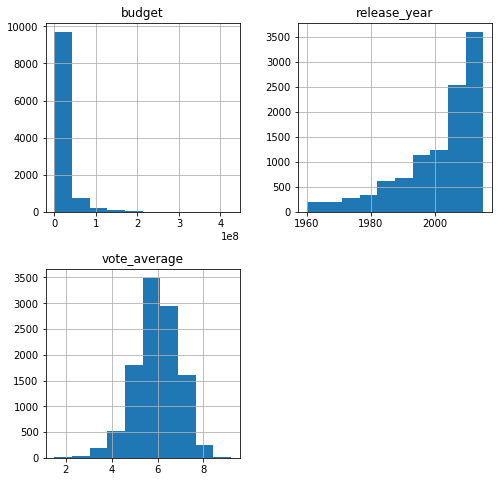

In [9]:
df.hist(figsize=(8,8));

In [10]:
sum(df.duplicated()) #to find the number of duplicated rows.

1

In [11]:
df.isna().sum()  #to find the number of null values in the dataset.

budget             0
original_title     0
genres            23
vote_average       0
release_year       0
dtype: int64

### Data Cleaning (after finding the flows of the dataset it's time to clean it)

In [12]:
df.dropna(inplace=True) #droping all the null values since we can't deal with null genre column.

In [13]:
df.isna().sum() #checking the dataframe that everything is as expected.

budget            0
original_title    0
genres            0
vote_average      0
release_year      0
dtype: int64

In [14]:
df.drop_duplicates(inplace=True) #drop all duplicates

In [15]:
sum(df.duplicated()) #checking the dataframe that everything is as expected.

0

In [16]:
#removing the data with 0 budget since it's a quality flow, also replacing it with the mean will affect the data negatively
#since it's almost half the data is missing the budget column.
zeroValues=df.query('budget==0')
zeroValues.count()

budget            5674
original_title    5674
genres            5674
vote_average      5674
release_year      5674
dtype: int64

In [17]:
df=df.drop(zeroValues.index)

In [18]:
df.shape #checking the final shape of the data frame.

(5168, 5)

In [19]:
df.describe() #seems more normal now!.

,budget,vote_average,release_year
count,5.168000e+03,5168.000000,5168.000000
mean,3.074552e+07,6.032895,2001.257159
std,3.890583e+07,0.883203,11.769554
min,1.000000e+00,1.500000,1960.000000
25%,6.000000e+06,5.500000,1996.000000
50%,1.700000e+07,6.100000,2005.000000
75%,4.000000e+07,6.600000,2010.000000
max,4.250000e+08,8.400000,2015.000000


In [20]:
df.dtypes #checking the types of every column. no change needed.

budget              int64
original_title     object
genres             object
vote_average      float64
release_year        int64
dtype: object

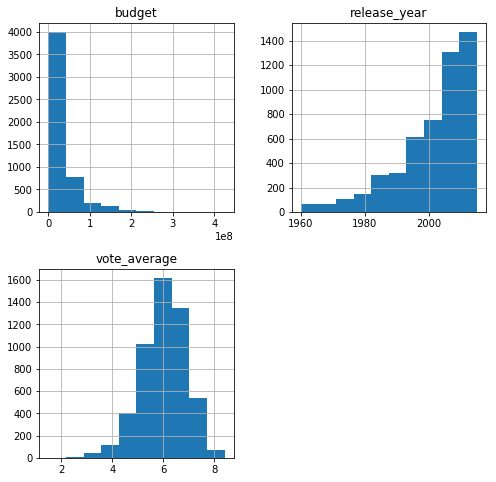

In [21]:
df.hist(figsize=(8,8));

In [22]:
 # now i'm going to split the data frame each row containing 1 genre instead of all of them together
split=df[df['genres'].str.contains('|')]
split

,budget,original_title,genres,vote_average,release_year
0,150000000,Jurassic World,Action|Adventure|Science Fiction|Thriller,6.5,2015
1,150000000,Mad Max: Fury Road,Action|Adventure|Science Fiction|Thriller,7.1,2015
2,110000000,Insurgent,Adventure|Science Fiction|Thriller,6.3,2015
3,200000000,Star Wars: The Force Awakens,Action|Adventure|Science Fiction|Fantasy,7.5,2015
4,190000000,Furious 7,Action|Crime|Thriller,7.3,2015
5,135000000,The Revenant,Western|Drama|Adventure|Thriller,7.2,2015
6,155000000,Terminator Genisys,Science Fiction|Action|Thriller|Adventure,5.8,2015
7,108000000,The Martian,Drama|Adventure|Science Fiction,7.6,2015
8,74000000,Minions,Family|Animation|Adventure|Comedy,6.5,2015
9,175000000,Inside Out,Comedy|Animation|Family,8.0,2015


In [23]:
#creating a new df to put the spiltted version of the df
spiltted_df = pd.DataFrame(columns = ['release_year', 'vote_average','genres','original_title','budget'])
spiltted_df

,release_year,vote_average,genres,original_title,budget


In [24]:
#this method will take 1 row and split it to multiple rows for each "genres" in the movies
#making it easier to deal with.
def splitting(row,length): 
    temp = 0
    global spiltted_df #our new dataframe that have the genre splitted
    while temp < length: #looping for each genre in the set of genres that are separated with pipe "|".
        new = row.copy() #making a copy of the row
        new['genres'] = row['genres'].split("|")[temp] #taking one part of the row with index i meaning; the first genre or the secound genre etc.
        spiltted_df=spiltted_df.append(new) # appending it to the newlist
        temp+=1 #increment

In [25]:
i=0
size = df.shape[0] #size will be the whole df
while i < size: #for each row in the data frame
    splitting(split.iloc[i],len(split['genres'].iloc[i].split("|"))) # send the row and it's length to the function splitting
    i+=1 #increment

In [26]:
spiltted_df #taking a look at the df.

,release_year,vote_average,genres,original_title,budget
0,2015,6.5,Action,Jurassic World,150000000
0,2015,6.5,Adventure,Jurassic World,150000000
0,2015,6.5,Science Fiction,Jurassic World,150000000
0,2015,6.5,Thriller,Jurassic World,150000000
1,2015,7.1,Action,Mad Max: Fury Road,150000000
1,2015,7.1,Adventure,Mad Max: Fury Road,150000000
1,2015,7.1,Science Fiction,Mad Max: Fury Road,150000000
1,2015,7.1,Thriller,Mad Max: Fury Road,150000000
2,2015,6.3,Adventure,Insurgent,110000000
2,2015,6.3,Science Fiction,Insurgent,110000000


In [27]:
spiltted_df.shape

(13601, 5)

In [28]:
df.shape #checking the shape after splitting.

(5168, 5)

<a id='eda'></a>
## Exploratory Data Analysis


### Research Question 1 (What is the highest rating genre of all time in this data set?)

In [29]:
genre_c = spiltted_df.groupby('genres', as_index=False).count() # we grouped the data each one with it's genre and count them
genre_c

gener_s = spiltted_df.groupby('genres', as_index=False).sum() # we grouped the data each one with it's genre and took the sum
gener_s

,genres,vote_average
0,Action,8395.6
1,Adventure,5443.5
2,Animation,1652.5
3,Comedy,10346.8
4,Crime,5115.0
5,Documentary,432.4
6,Drama,14580.5
7,Family,3151.0
8,Fantasy,3025.0
9,Foreign,206.3


In [30]:
genre_c

,genres,release_year,vote_average,original_title,budget
0,Action,1428,1428,1428,1428
1,Adventure,906,906,906,906
2,Animation,260,260,260,260
3,Comedy,1740,1740,1740,1740
4,Crime,823,823,823,823
5,Documentary,64,64,64,64
6,Drama,2316,2316,2316,2316
7,Family,523,523,523,523
8,Fantasy,508,508,508,508
9,Foreign,35,35,35,35


In [31]:
merge = genre_c.merge(gener_s,left_on='genres', right_on='genres') # merging the two data frames
merge.drop(['release_year','original_title','budget'],axis=1,inplace=True) # droping the duplicated columns
merge=merge.rename(index=str,columns={'vote_average_y':'sum_genre','vote_average_x':'count_genre'}) # renaming it for clearer names

In [32]:
merge['sum_genre/count_genre'] = np.where(merge['count_genre'] < 1, merge['count_genre'], merge['sum_genre']/merge['count_genre']) # dividing the two columns 

In [33]:
merge

,genres,count_genre,sum_genre,sum_genre/count_genre
0,Action,1428,8395.6,5.879272
1,Adventure,906,5443.5,6.008278
2,Animation,260,1652.5,6.355769
3,Comedy,1740,10346.8,5.946437
4,Crime,823,5115.0,6.215067
5,Documentary,64,432.4,6.756250
6,Drama,2316,14580.5,6.295553
7,Family,523,3151.0,6.024857
8,Fantasy,508,3025.0,5.954724
9,Foreign,35,206.3,5.894286


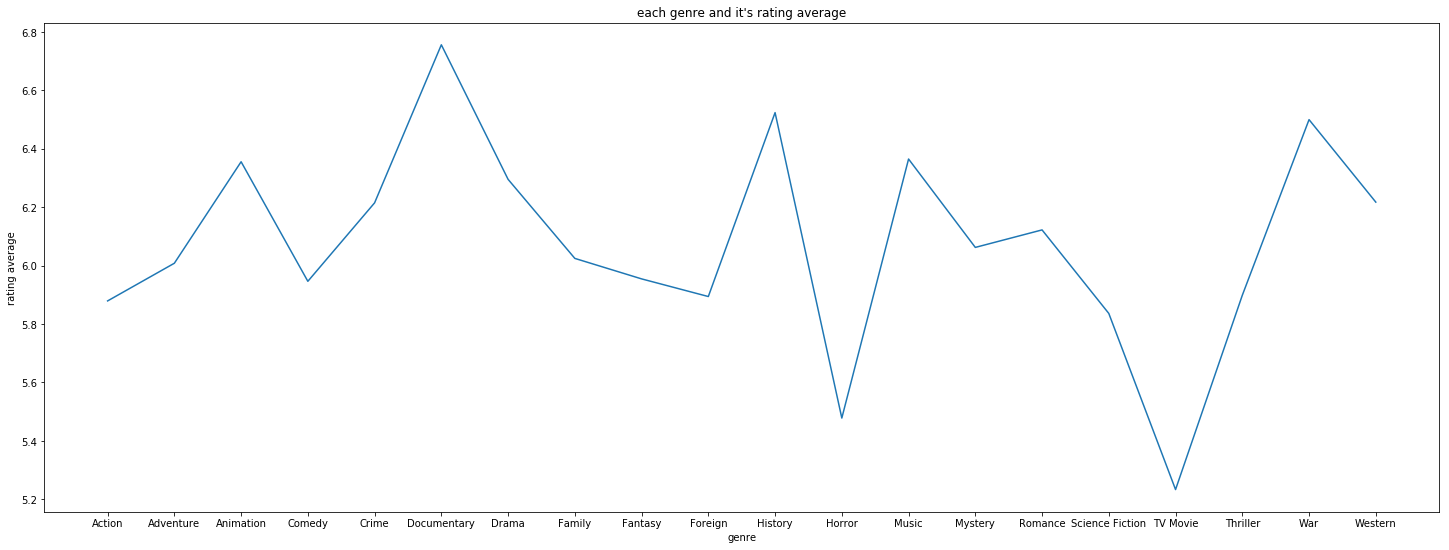

In [34]:
# now visualizing the data to answer the question
x=['Action','Adventure','Animation','Comedy','Crime','Documentary','Drama','Family','Fantasy','Foreign','History','Horror','Music','Mystery','Romance','Science Fiction','TV Movie','Thriller','War','Western']
plt.plot(x,merge['sum_genre/count_genre']);
fig = plt.gcf();
fig.set_size_inches(25,9)
plt.xlabel('genre')
plt.ylabel('rating average')
plt.title('each genre and it\'s rating average')
plt.show()


In [35]:
#as we can see that Documentary is the highst rated genra by the users

### Research Question 2 -relationship between budget and voting average-

##### I'm going to seperate the movies to 2 dataframe.
##### high budget movie will have the upper qurader 75-100% 
##### Low budget movies will have lower qurader 0-25%

In [36]:
df.describe()

,budget,vote_average,release_year
count,5.168000e+03,5168.000000,5168.000000
mean,3.074552e+07,6.032895,2001.257159
std,3.890583e+07,0.883203,11.769554
min,1.000000e+00,1.500000,1960.000000
25%,6.000000e+06,5.500000,1996.000000
50%,1.700000e+07,6.100000,2005.000000
75%,4.000000e+07,6.600000,2010.000000
max,4.250000e+08,8.400000,2015.000000


In [37]:
high_budget =df.budget > 40000000 # high budget movies will have 40,000,000$ or more.
df[high_budget].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1199 entries, 0 to 10758
Data columns (total 5 columns):
budget            1199 non-null int64
original_title    1199 non-null object
genres            1199 non-null object
vote_average      1199 non-null float64
release_year      1199 non-null int64
dtypes: float64(1), int64(2), object(2)
memory usage: 56.2+ KB


In [38]:
low_budget = df.budget <= 6000000 #low budget movies will have less than 6,000,000$ budget.
df[low_budget].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1354 entries, 35 to 10865
Data columns (total 5 columns):
budget            1354 non-null int64
original_title    1354 non-null object
genres            1354 non-null object
vote_average      1354 non-null float64
release_year      1354 non-null int64
dtypes: float64(1), int64(2), object(2)
memory usage: 63.5+ KB


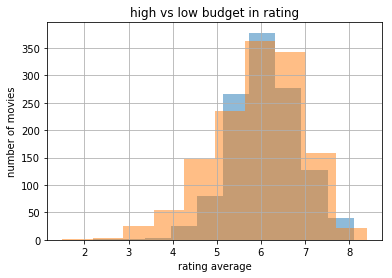

In [39]:
df.vote_average[high_budget].hist(label = 'high_budget',alpha=0.5);
df.vote_average[low_budget].hist(label = 'low_budget', alpha=0.5);
plt.xlabel('rating average')
plt.ylabel('number of movies')
plt.title('high vs low budget in rating')
plt.show()

In [40]:
print(df[high_budget].mean()) #checking the mean
print(df[low_budget].mean())

budget          8.605500e+07
vote_average    6.104504e+00
release_year    2.004832e+03
dtype: float64
budget          2.592941e+06
vote_average    5.949778e+00
release_year    1.997641e+03
dtype: float64


In [41]:
#both have the same mean (6)

In [44]:
# will, we can see that low and high budget doesn't affect the rating of the movie since it's almost the same.
# and to answer the question above: no budget doesn't affect the rating

<a id='conclusions'></a>
## Conclusions


In [45]:
# other than the limitation of my exploration due to lack of statistical skills we can say about our findings that:-
# finally, after applying the analysis steps to this data set we can conclude that budget doesn't affect  the rating of a movie 
#also for this data set documentaries movies have the highest ratings.